# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [ ]:
data['quality'].value_counts()

quality
2    2198
1    1457
3     880
0     183
4     180
Name: count, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [ ]:
# int 인코딩 되있음, y전처리 안해도됨

In [ ]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [ ]:
y_val.value_counts()

quality
2    660
1    438
3    250
4     61
0     61
Name: count, dtype: int64

### (1) 모델1

In [ ]:
n=x_train.shape[1]
n

11

In [ ]:
model1 = Sequential([Dense(10, input_shape=(n,), activation='relu'),
                     Dense(10, activation='relu'),
                     Dense(5, activation='relu'),
                     Dense(5, activation='softmax')])
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                120       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
 dense_36 (Dense)            (None, 5)                 30        
                                                                 
Total params: 315 (1.23 KB)
Trainable params: 315 (1.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
86/86 [==============================] - 1s 5ms/step - loss: 1.2958 - val_loss: 1.1206
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1700 - val_loss: 1.0381
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1333 - val_loss: 1.0300
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1294 - val_loss: 1.0107
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1212 - val_loss: 1.0405
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1214 - val_loss: 1.0254
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1135 - val_loss: 1.0104
Epoch 8/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1087 - val_loss: 0.9972
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1039 - val_loss: 1.0019
Epoch 10/50
86/86 [==============================] - 0s 3ms/step - loss: 1.0985 - val_loss: 1.0225
Epoch 11/50
86/86 [

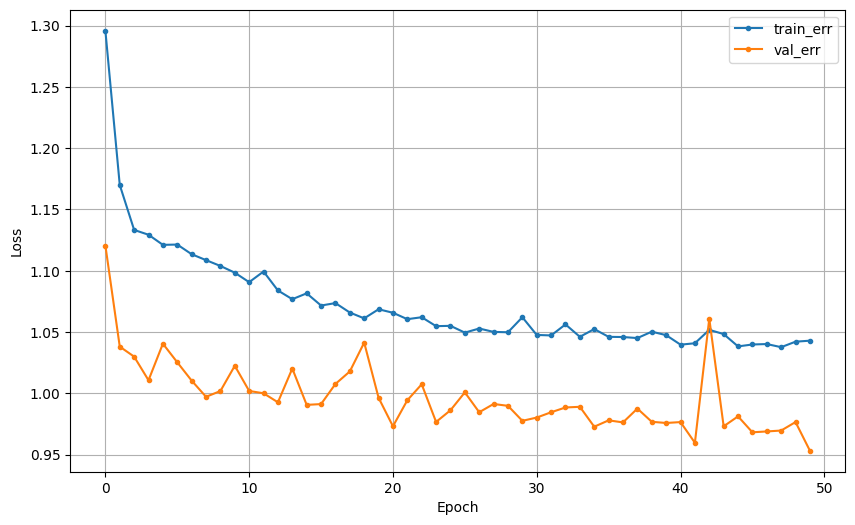

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
hist = model1.fit(x_train, y_train, epochs=50, validation_split=.2).history
dl_history_plot(hist)

In [ ]:
pred = model1.predict(x_val)
pred = np.argmax(pred, axis=1) # pred.argmax(axis=1)
pred

46/46 [==============================] - 0s 2ms/step


array([2, 2, 2, ..., 2, 1, 2])

In [ ]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

# 대각선 맞은것
# 틀린거 자세히보기 : (컬럼 0,1,2,3,4) 중 4를 예측안함 =>
# 1로 예측했는데 2로 잘못예측 많음 => 어떻게 틀렸냐따라 비지니스 평가
# y y헷 실제는 싼제품인데 비싸게 예측

[[  0  43  18   0   0]
 [  0 281 151   6   0]
 [  0 140 471  49   0]
 [  0   8 179  63   0]
 [  0   0  40  21   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.60      0.64      0.62       438
           2       0.55      0.71      0.62       660
           3       0.45      0.25      0.32       250
           4       0.00      0.00      0.00        61

    accuracy                           0.55      1470
   macro avg       0.32      0.32      0.31      1470
weighted avg       0.50      0.55      0.52      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2) 모델2

Epoch 1/50
86/86 [==============================] - 1s 4ms/step - loss: 1.3173 - val_loss: 1.1664
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 1.2289 - val_loss: 1.1342
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 1.2054 - val_loss: 1.1040
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1879 - val_loss: 1.0916
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1776 - val_loss: 1.0777
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1660 - val_loss: 1.0694
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1561 - val_loss: 1.0592
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1517 - val_loss: 1.0526
Epoch 9/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1451 - val_loss: 1.0473
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1417 - val_loss: 1.0464
Epoch 11/50
86/86 [

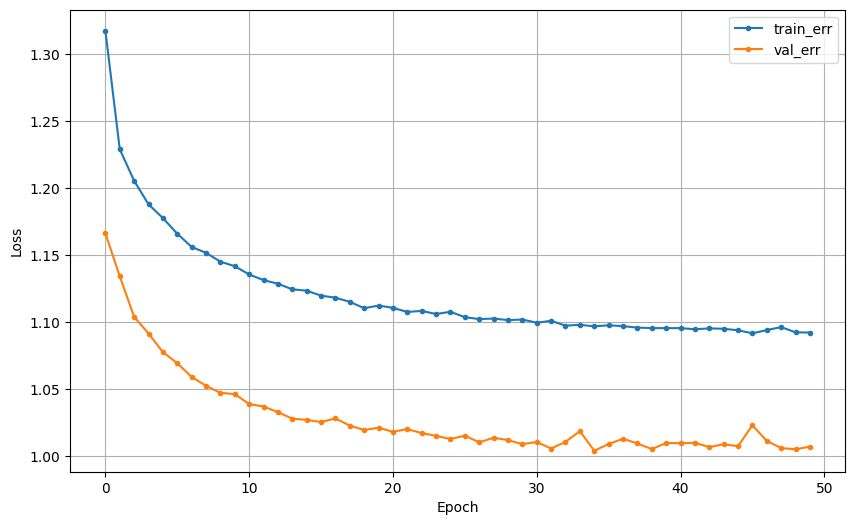

In [ ]:
model1 = Sequential(Dense(5, input_shape=(n,), activation='softmax'))

model1.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
hist = model1.fit(x_train, y_train, epochs=50, validation_split=.2).history
dl_history_plot(hist)

### (3) 모델3

Epoch 1/50
86/86 [==============================] - 1s 8ms/step - loss: 1.3690 - val_loss: 1.2142
Epoch 2/50
86/86 [==============================] - 0s 4ms/step - loss: 1.2793 - val_loss: 1.2122
Epoch 3/50
86/86 [==============================] - 0s 5ms/step - loss: 1.2745 - val_loss: 1.2151
Epoch 4/50
86/86 [==============================] - 0s 5ms/step - loss: 1.2673 - val_loss: 1.2014
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 1.2668 - val_loss: 1.1933
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 1.2635 - val_loss: 1.1938
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 1.2620 - val_loss: 1.1912
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 1.2583 - val_loss: 1.1731
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 1.2478 - val_loss: 1.1578
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 1.2380 - val_loss: 1.1453
Epoch 11/50
86/86 [

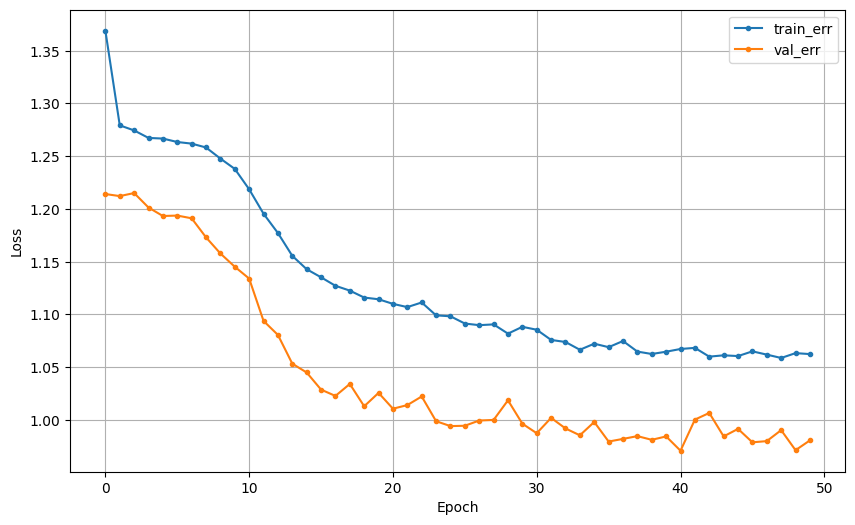

In [ ]:
model1 = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                     Dense(3, activation='relu'),
                     Dense(5, activation='softmax')])

model1.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
hist = model1.fit(x_train, y_train, epochs=50, validation_split=.2).history
dl_history_plot(hist)